In [1]:
import pandas as pd
import numpy as np
import regex as re
import seaborn as sns

In [2]:
data = pd.read_csv('i30.csv')
data.head(5)

,Price,Desc,Loc,kms,Transmision,engine,Engi,body type,Year
0,"$9,999",2010 Hyundai i30 SX Auto White,"Greenslopes, QLD",102000,Auto,4 cyl 2.0L,2,Hatchback,2010
1,"$9,999",2009 Hyundai i30 FD MY09 SX Red 5 Speed Manual...,"Invermay, TAS",132931,Manual,4 cyl 2.0L,2,Hatchback,2009
2,"$9,999",2008 Hyundai i30 FD SR White 4 Speed Automatic...,"Victoria Park, WA",161000,Auto,4 cyl 2.0L,2,Hatchback,2008
3,"$9,995",2011 Hyundai i30 FD MY11 SX 1.6 CRDi Blue 5 Sp...,"Capalaba, QLD",177305,Manual,4 cyl 1.6L,"1,6",Hatchback,2011
4,"$9,995",2010 Hyundai i30 SX,"Moorooka, QLD",187703,Auto,4 cyl 1.6L,"1,6",Hatchback,2010


In [3]:
data.shape

(689, 9)

In [4]:
data.columns

Index(['Price', 'Desc', 'Loc', 'kms', 'Transmision', 'engine', 'Engi',
       'body type', 'Year'],
      dtype='object')

In [5]:
data.dtypes

Price          object
Desc           object
Loc            object
kms             int64
Transmision    object
engine         object
Engi           object
body type      object
Year           object
dtype: object

### Data Cleansing

In [6]:
data['Price'] = data['Price'].str.replace('[A-Za-z]', '').str.replace('$', '')
data['Price'] = data['Price'].str.replace('[A-Za-z]', '').str.replace(',', '')

In [7]:
data.Price = data.Price.astype(float)

In [8]:
data.Price.describe()

count      689.000000
mean     23363.031930
std      11742.092429
min       4985.000000
25%      14990.000000
50%      21990.000000
75%      28350.000000
max      62990.000000
Name: Price, dtype: float64

In [9]:
#

In [10]:
data["Engi"] = data['Engi'].str.replace('?', '')#.astype(float)
data["Engi"] = data['Engi'].str.replace(',', '.')#.astype(float)



In [11]:
data['Engi'].replace('', np.nan, inplace=True)

In [12]:
data.dropna(inplace = True)

In [13]:
data.Engi.value_counts()

2      340
1.8    158
1.6    145
Name: Engi, dtype: int64

In [14]:
data.Engi = data.Engi.astype(float)

In [15]:
data.engine.value_counts()

4 cyl 2.0L    340
4 cyl 1.8L    158
4 cyl 1.6L    144
1600            1
Name: engine, dtype: int64

In [16]:
data["Year"] = data['Year'].str.replace('?', '0').astype(int)

In [17]:
data.dtypes

Price          float64
Desc            object
Loc             object
kms              int64
Transmision     object
engine          object
Engi           float64
body type       object
Year             int32
dtype: object

In [18]:
data.shape

(643, 9)

In [19]:
data.engine.value_counts()

4 cyl 2.0L    340
4 cyl 1.8L    158
4 cyl 1.6L    144
1600            1
Name: engine, dtype: int64

### Analisis outliers

In [20]:
data_price = data.groupby(['Engi'])[['Price']]

In [21]:
data_price.describe()

Price                                                                 \
      count          mean           std     min      25%      50%      75%   
Engi                                                                         
1.6   145.0  25497.689655  11959.363869  4990.0  12990.0  28999.0  35415.0   
1.8   158.0  16783.531646   3276.866475  7690.0  14990.0  16994.5  18990.0   
2.0   340.0  26011.255882  12794.092561  4985.0  18998.0  24919.0  29490.0   

               
          max  
Engi           
1.6   55750.0  
1.8   23990.0  
2.0   62990.0

In [22]:
q1 = data_price.quantile(0.25)
print(q1)
q2 = data_price.quantile(0.5)
print(q2)
q3 = data_price.quantile(0.75)
print(q3)

        Price
Engi         
1.6   12990.0
1.8   14990.0
2.0   18998.0
        Price
Engi         
1.6   28999.0
1.8   16994.5
2.0   24919.0
        Price
Engi         
1.6   35415.0
1.8   18990.0
2.0   29490.0


In [23]:
#Se calculan los valores límites a partir de los cuales se delimitarán los valores outliers
iqr = (q3 - q1) * 1.5

up_threshold = q3 + iqr
low_threshold = q1 - iqr

print(up_threshold)
print(low_threshold)

        Price
Engi         
1.6   69052.5
1.8   24990.0
2.0   45228.0
        Price
Engi         
1.6  -20647.5
1.8    8990.0
2.0    3260.0


In [24]:
data["outliers"] = data.groupby("Engi")["Price"].transform(lambda grp:  (grp < up_threshold['Price'][grp.name]))


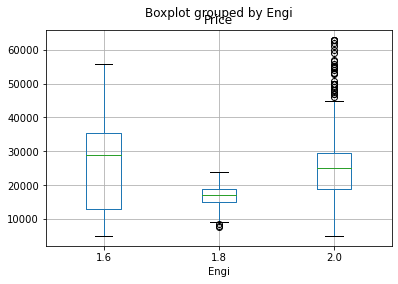

In [25]:
fig = data.boxplot(by='Engi',column= ['Price']) 

In [26]:
data

,Price,Desc,Loc,kms,Transmision,engine,Engi,body type,Year,outliers
0,9999.0,2010 Hyundai i30 SX Auto White,"Greenslopes, QLD",102000,Auto,4 cyl 2.0L,2.0,Hatchback,2010,True
1,9999.0,2009 Hyundai i30 FD MY09 SX Red 5 Speed Manual...,"Invermay, TAS",132931,Manual,4 cyl 2.0L,2.0,Hatchback,2009,True
2,9999.0,2008 Hyundai i30 FD SR White 4 Speed Automatic...,"Victoria Park, WA",161000,Auto,4 cyl 2.0L,2.0,Hatchback,2008,True
3,9995.0,2011 Hyundai i30 FD MY11 SX 1.6 CRDi Blue 5 Sp...,"Capalaba, QLD",177305,Manual,4 cyl 1.6L,1.6,Hatchback,2011,True
4,9995.0,2010 Hyundai i30 SX,"Moorooka, QLD",187703,Auto,4 cyl 1.6L,1.6,Hatchback,2010,True
...,...,...,...,...,...,...,...,...,...,...
684,10898.0,2012 Hyundai i30 FD MY11 SLX Grey 4 Speed Auto...,"Canning Vale, WA",155338,Auto,4 cyl 1.6L,1.6,Hatchback,2012,True
685,10800.0,2013 Hyundai i30 GD Active White 6 Speed Manua...,"Minchinbury, NSW",199172,Manual,4 cyl 1.8L,1.8,Hatchback,2013,True
686,10460.0,2012 Hyundai i30 FD MY12 Trophy White 5 Speed ...,"Traralgon, VIC",167201,Manual,4 cyl 2.0L,2.0,Hatchback,2012,True
687,10451.0,2012 Hyundai i30 FD MY12 Trophy Red 5 Speed Ma...,"Traralgon, VIC",105747,Manual,4 cyl 2.0L,2.0,Hatchback,2012,True


In [27]:
data = data[data.outliers != False]

In [28]:
data.shape

(608, 10)

<AxesSubplot:title={'center':'Price'}, xlabel='Engi'>

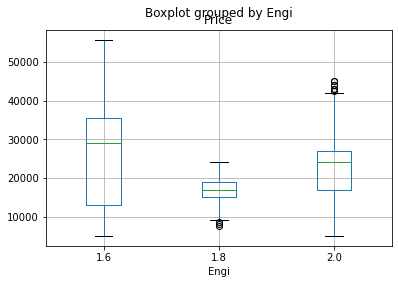

In [29]:
data.boxplot(by='Engi',column= ['Price']) 